In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import xgboost as xgb

### to classification

In [30]:
data=pd.read_csv('transformed_data.csv')

<Axes: xlabel='LogReturn', ylabel='Count'>

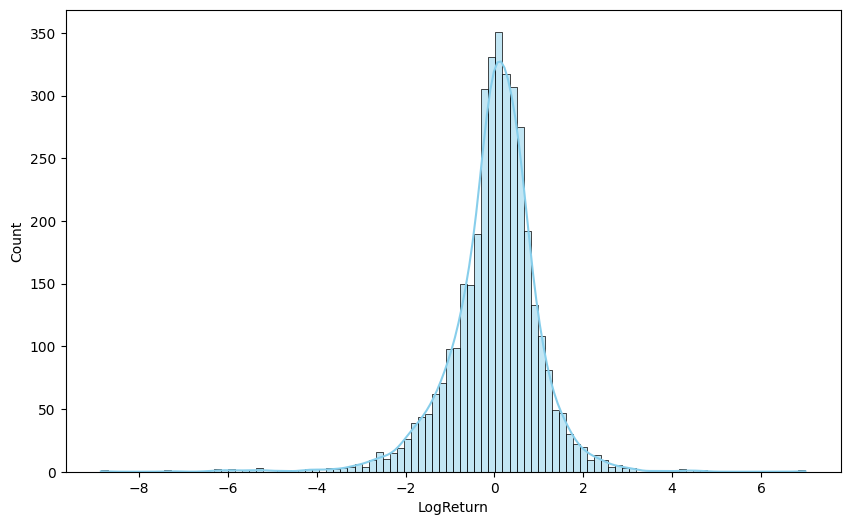

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['LogReturn'], bins=100, kde=True, color='skyblue')

In [32]:
data_class=data.copy()

In [33]:
print(data.shape)         # Ile ma 'data'
print(data_class.shape)   # Ile ma 'data_class'

(3705, 56)
(3705, 56)


### Train test

In [34]:
data_class['date']=pd.to_datetime(data_class['date'])

In [35]:
print(data_class.shape) 

(3705, 56)


In [36]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   LogReturn                 3705 non-null   float64       
 1   log_volume                3705 non-null   float64       
 2   ma_log_volume             3705 non-null   float64       
 3   prev_day_volume           3705 non-null   float64       
 4   date                      3705 non-null   datetime64[ns]
 5   gdp                       3705 non-null   float64       
 6   interest_rate             3705 non-null   float64       
 7   unemployment              3705 non-null   float64       
 8   cpi                       3705 non-null   float64       
 9   pce                       3705 non-null   float64       
 10  nonfarm_payrolls          3705 non-null   float64       
 11  corporate_profits         3705 non-null   float64       
 12  money_supply        

In [37]:
data_class = data_class.loc[data_class['date'].dt.year < 2019]
data_final_log = data_class.copy()
data_class['LogReturn']=(data['LogReturn'] > 0).astype(int)

In [38]:
X=data_class.drop(['LogReturn','date'],axis=1)
Y=data_class['LogReturn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Trening modelu
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Metryki
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Wyniki
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")


Accuracy : 79.32%
Precision: 79.83%
Recall   : 81.55%


Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:14:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:14:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:14:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:14:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/

✅ Najlepsze parametry:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}


/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


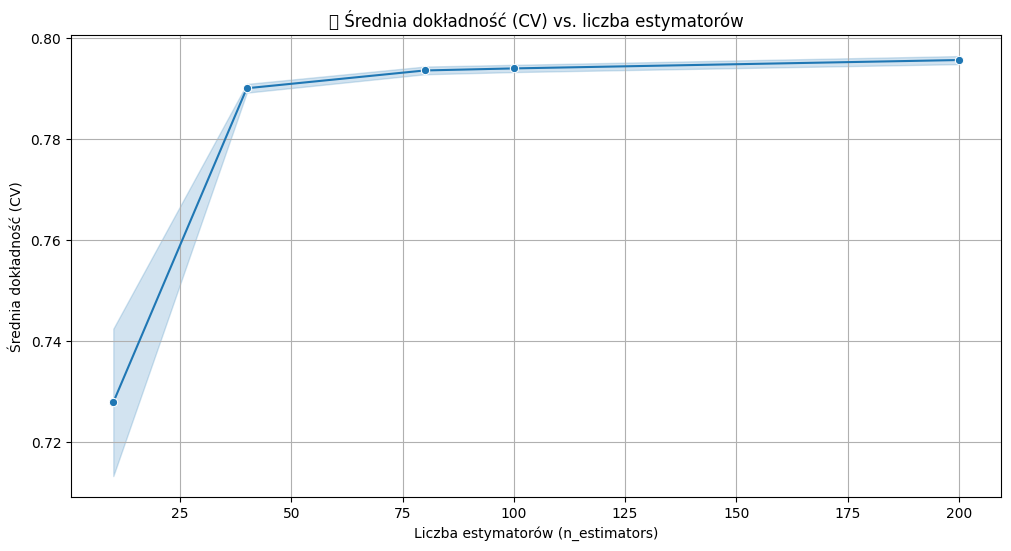

🎯 Accuracy na zbiorze testowym: 80.91%

📋 Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       207
           1       0.82      0.82      0.82       233

    accuracy                           0.81       440
   macro avg       0.81      0.81      0.81       440
weighted avg       0.81      0.81      0.81       440



In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Więcej estymatorów i głębokości
param_grid = {
    'n_estimators': [10,40,80,100, 200],
    'max_depth': [3, 5, 7, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.2, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

print("✅ Najlepsze parametry:")
print(grid_search.best_params_)

# Tworzymy DataFrame z wynikami
results_df = pd.DataFrame(grid_search.cv_results_)

# Uśredniona dokładność z walidacji krzyżowej
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x="param_n_estimators", y="mean_test_score", marker="o")
plt.title("📊 Średnia dokładność (CV) vs. liczba estymatorów")
plt.xlabel("Liczba estymatorów (n_estimators)")
plt.ylabel("Średnia dokładność (CV)")
plt.grid(True)
plt.show()

best_model = grid_search.best_estimator_

# Predykcja i ocena
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"🎯 Accuracy na zbiorze testowym: {acc * 100:.2f}%")
print("\n📋 Raport klasyfikacji:")
print(classification_report(y_test, y_pred))


In [14]:
X.columns

Index(['log_volume', 'ma_log_volume', 'prev_day_volume', 'gdp',
       'interest_rate', 'unemployment', 'cpi', 'pce', 'nonfarm_payrolls',
       'corporate_profits', 'money_supply', 'consumer_confidence',
       'housing_starts', 'permits', 'interest_rate_lag1', 'unemployment_lag1',
       'cpi_lag1', 'pce_lag1', 'interest_rate_roll3_mean',
       'interest_rate_roll3_std', 'cpi_roll3_mean', 'cpi_roll3_std',
       'interest_x_cpi', 'unemp_x_gdp', 'index', 'Gold_LogReturn', 'Gold_MA10',
       'Gold_MA50', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos',
       'dayofmonth_sin', 'dayofmonth_cos', 'dayofyear_sin', 'dayofyear_cos',
       'MA10', 'MA50', 'volatility_10', 'MACD', 'MACD_signal', 'BB_upper',
       'BB_lower', 'RSI', 'LogReturn_lag1', 'LogReturn_lag2', 'LogReturn_lag3',
       'LogReturn_lag4', 'LogReturn_lag5', 'LogReturn_lag6', 'LogReturn_lag7',
       'LogReturn_lag8', 'LogReturn_lag9', 'LogReturn_lag10'],
      dtype='object')

/tmp/ipykernel_2296/3158898604.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15), palette='viridis')


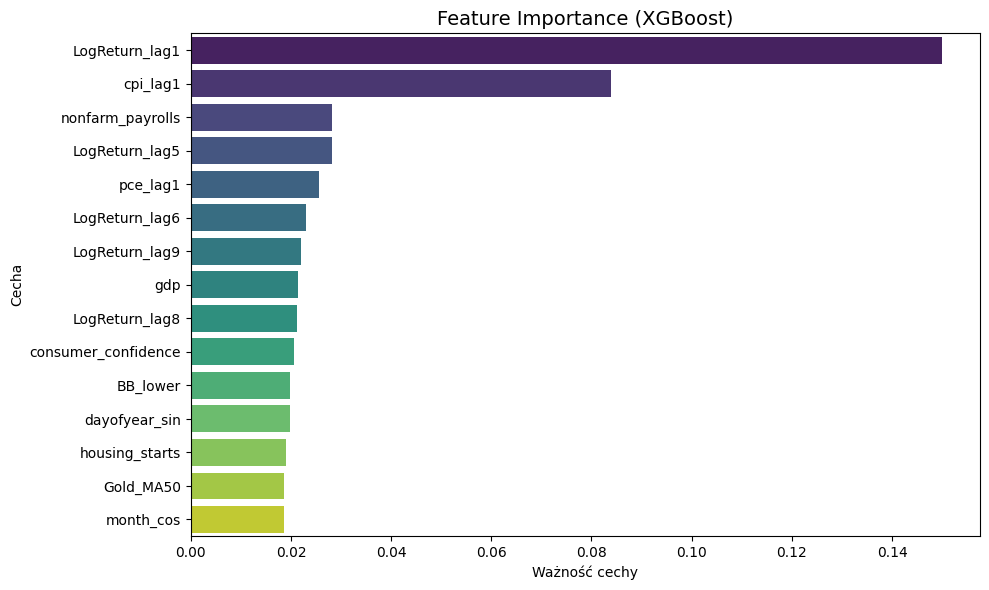

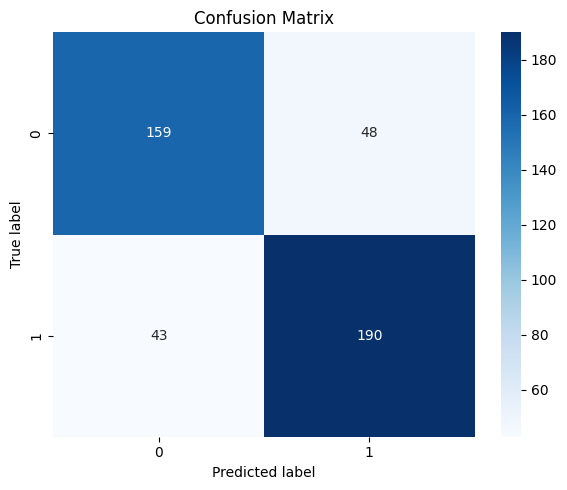

In [15]:
# === FEATURE IMPORTANCE ===
importance = model.feature_importances_
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Wykres: Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15), palette='viridis')
plt.title('Feature Importance (XGBoost)', fontsize=14)
plt.xlabel('Ważność cechy')
plt.ylabel('Cecha')
plt.tight_layout()
plt.show()

# === CONFUSION MATRIX ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

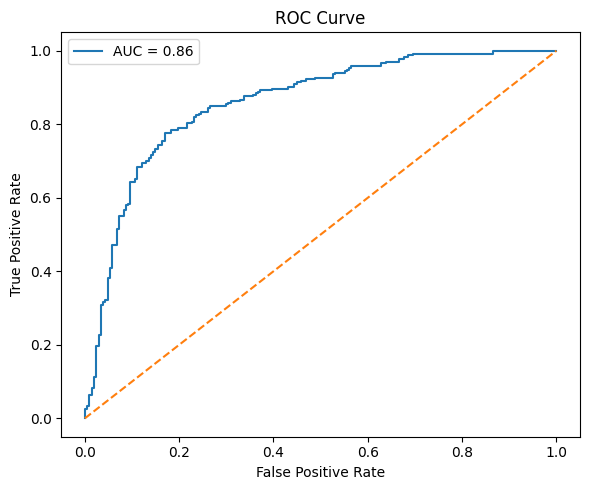

In [16]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

### NEW MODEL

In [17]:
q1 = data['LogReturn'].quantile(0.25)
q2 = data['LogReturn'].quantile(0.50)  # Mediana
q3 = data['LogReturn'].quantile(0.75)

# Tworzymy nowe kolumny klasyfikacji na podstawie kwartyli
def classify_log_return(row):
    if row['LogReturn'] <= q1:
        return 0  # Klasa 0 - pierwszy kwartyl
    elif row['LogReturn'] <= q2:
        return 1  # Klasa 1 - drugi kwartyl
    elif row['LogReturn'] <= q3:
        return 2  # Klasa 2 - trzeci kwartyl
    else:
        return 3  # Klasa 3 - czwarty kwartyl

# Przypisanie klas do danych
data_class4=data.copy()
data_class4['LogReturn'] = data_class4.apply(classify_log_return, axis=1)

# Zobaczmy wyniki
print(data_class4['LogReturn'].head())

0    2
1    2
2    2
3    3
4    3
Name: LogReturn, dtype: int64


Accuracy : 58.18%
Precision: 58.48%
Recall   : 59.57%

Feature Importances:
                     Feature  Importance
44            LogReturn_lag1    0.120665
5               unemployment    0.037040
18  interest_rate_roll3_mean    0.030683
48            LogReturn_lag5    0.027720
38             volatility_10    0.027686
23               unemp_x_gdp    0.026443
20            cpi_roll3_mean    0.022987
13                   permits    0.021975
42                  BB_lower    0.020143
9          corporate_profits    0.019896
49            LogReturn_lag6    0.019446
16                  cpi_lag1    0.019442
8           nonfarm_payrolls    0.019211
50            LogReturn_lag7    0.019091
33            dayofmonth_cos    0.019061
1              ma_log_volume    0.019025
11       consumer_confidence    0.018501
35             dayofyear_cos    0.018022
39                      MACD    0.017802
12            housing_starts    0.017755
29                 month_cos    0.017000
40               MACD_

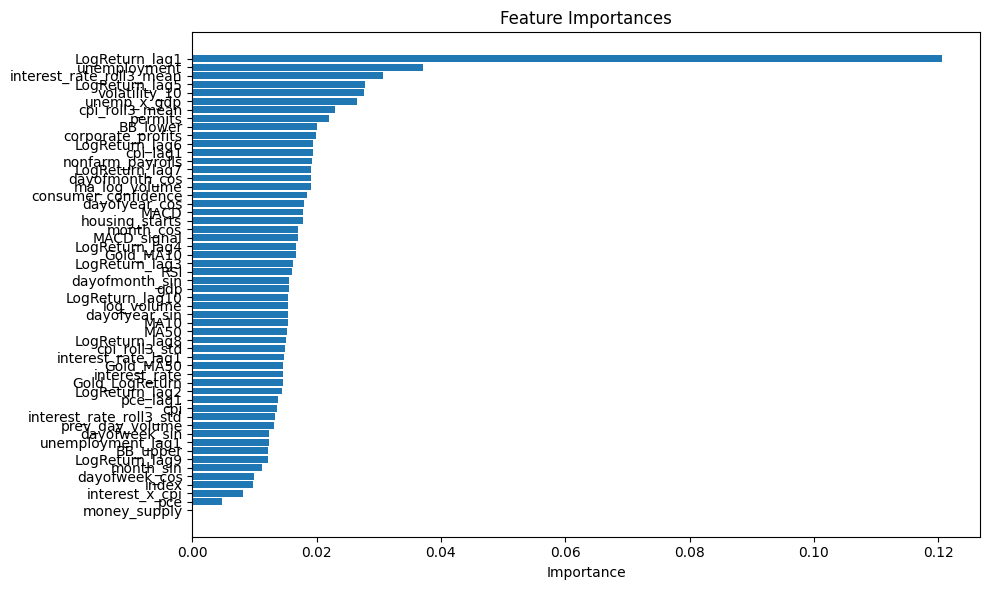

In [18]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Przekształcenie kolumny daty
data_class4['date'] = pd.to_datetime(data_class4['date'])
data_class4 = data_class4.loc[data_class4['date'].dt.year < 2019]

# Dane wejściowe i cel
X = data_class4.drop(['LogReturn', 'date'], axis=1)
Y = data_class4['LogReturn']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model XGBoost dla klasyfikacji wieloklasowej
model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Metryki
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")

# Feature importances
importance = model.feature_importances_
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feat_importance)

# (Opcjonalnie) wykres
plt.figure(figsize=(10, 6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


/tmp/ipykernel_2296/4185270896.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(20), x="importance", y="feature", palette="viridis")


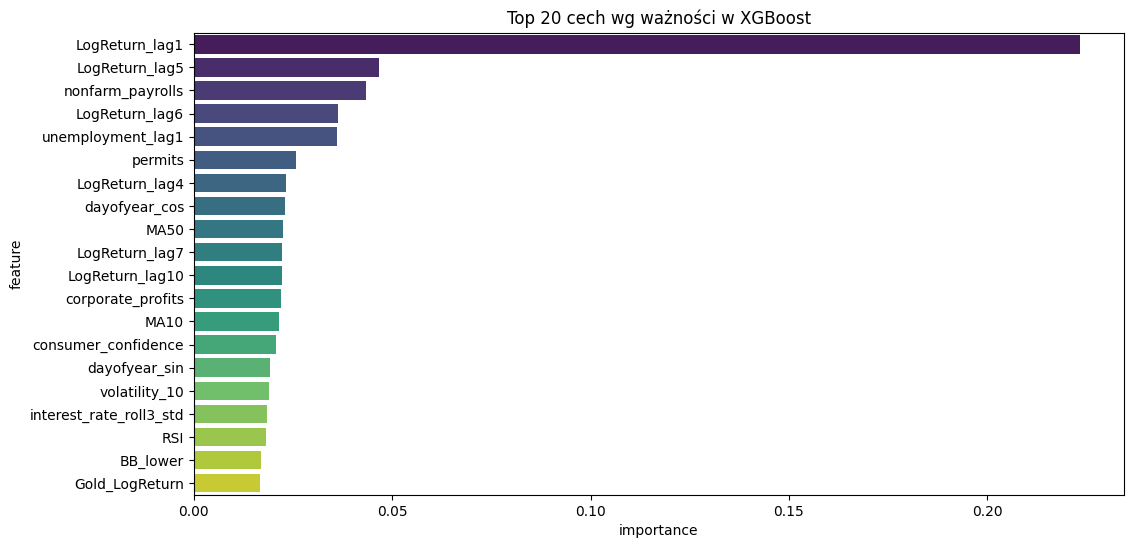

Cechy do usunięcia: ['Gold_MA50', 'dayofmonth_cos', 'MACD_signal', 'BB_upper', 'month_cos', 'LogReturn_lag2', 'LogReturn_lag8', 'housing_starts', 'LogReturn_lag9', 'prev_day_volume', 'month_sin', 'gdp', 'Gold_MA10', 'dayofweek_sin', 'unemp_x_gdp', 'index', 'interest_rate_lag1', 'interest_rate_roll3_mean', 'ma_log_volume', 'log_volume', 'cpi_roll3_std', 'cpi_lag1', 'interest_x_cpi', 'interest_rate', 'cpi', 'unemployment', 'cpi_roll3_mean', 'pce_lag1', 'pce', 'money_supply']


In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#--- Dane wejściowe ---
X = data_class.drop(columns=["date", "LogReturn"])
y = data_class["LogReturn"]

#--- Podział na zbiór treningowy i testowy ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#--- Trening modelu ---
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

#--- Znaczenie cech ---
importances = model.feature_importances_
features = X.columns

#--- Sortowanie i wizualizacja ---
importance_df = pd.DataFrame({"feature": features, "importance": importances})
importance_df = importance_df.sort_values(by="importance", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=importance_df.head(20), x="importance", y="feature", palette="viridis")
plt.title("Top 20 cech wg ważności w XGBoost")
plt.show()
threshold = 0.015
low_importance = importance_df[importance_df["importance"] <= threshold]["feature"].tolist()

print("Cechy do usunięcia:", low_importance)

# Usuwanie ich z danych
X_reduced = X.drop(columns=low_importance)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, shuffle=False)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import xgboost as xgb

# Trening modelu
model = xgb.XGBClassifier()
model.fit(X_train_r, y_train_r)

# Predykcja
y_pred_r = model.predict(X_test_r)

# Metryki
accuracy = accuracy_score(y_test_r, y_pred_r)
precision = precision_score(y_test_r, y_pred_r)
recall = recall_score(y_test_r, y_pred_r)

# Wyniki
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")


Accuracy: 75.91%
Precision: 80.19%
Recall: 72.65%


In [21]:
import xgboost as xgb

# Trenujesz model
model = xgb.XGBClassifier()
model.fit(X_train_r, y_train_r)

# Uzyskaj obiekt booster i wszystkie drzewa w postaci tekstowej
booster = model.get_booster()
tree_dump = booster.get_dump(with_stats=True)

# Sprawdź liczbę drzew
num_trees = len(tree_dump)
print(f"Liczba drzew: {num_trees}")

# Wypisz ostatnie drzewo
print("Ostatnie drzewo:")
print(tree_dump[-1])  # ostatnie drzewo ma indeks -1

Liczba drzew: 100
Ostatnie drzewo:
0:[LogReturn_lag1<0.457668394] yes=1,no=2,missing=2,gain=0.0755375102,cover=32.4284439
	1:[LogReturn_lag6<-1.23569942] yes=3,no=4,missing=4,gain=0.0892439783,cover=27.0747776
		3:leaf=-0.0572936051,cover=1.88640904
		4:[LogReturn_lag4<0.342312604] yes=7,no=8,missing=8,gain=0.126581386,cover=25.1883698
			7:[dayofmonth_sin<0.897804558] yes=11,no=12,missing=12,gain=0.102028556,cover=18.0076008
				11:[volatility_10<-0.00471161911] yes=17,no=18,missing=18,gain=0.144302472,cover=15.3659859
					17:[LogReturn_lag5<0.213516891] yes=25,no=26,missing=26,gain=0.118085742,cover=12.7393808
						25:leaf=0.02191782,cover=9.77494717
						26:leaf=-0.0387346931,cover=2.96443319
					18:[MACD<-0.783237219] yes=27,no=28,missing=28,gain=0.043602556,cover=2.62660551
						27:leaf=0.0144169107,cover=1.22489572
						28:leaf=0.0990089551,cover=1.40170979
				12:[LogReturn_lag4<-0.153645337] yes=19,no=20,missing=20,gain=0.0793165118,cover=2.64161539
					19:leaf=-0.063434

In [22]:
with open("last_tree.txt", "w") as f:
    f.write(tree_dump[-1])

In [23]:
X_reduced.shape
X_reduced.columns

Index(['nonfarm_payrolls', 'corporate_profits', 'consumer_confidence',
       'permits', 'unemployment_lag1', 'interest_rate_roll3_std',
       'Gold_LogReturn', 'dayofweek_cos', 'dayofmonth_sin', 'dayofyear_sin',
       'dayofyear_cos', 'MA10', 'MA50', 'volatility_10', 'MACD', 'BB_lower',
       'RSI', 'LogReturn_lag1', 'LogReturn_lag3', 'LogReturn_lag4',
       'LogReturn_lag5', 'LogReturn_lag6', 'LogReturn_lag7',
       'LogReturn_lag10'],
      dtype='object')

In [24]:
data_class['LogReturn'] = data_final_log["LogReturn"]
data_final = data_class[['LogReturn','nonfarm_payrolls', 'corporate_profits', 'consumer_confidence',
       'permits', 'unemployment_lag1', 'interest_rate_roll3_std',
       'Gold_LogReturn', 'dayofweek_cos', 'dayofmonth_sin', 'dayofyear_sin',
       'dayofyear_cos', 'MA10', 'MA50', 'volatility_10', 'MACD', 'BB_lower',
       'RSI', 'LogReturn_lag1', 'LogReturn_lag3', 'LogReturn_lag4',
       'LogReturn_lag5', 'LogReturn_lag6', 'LogReturn_lag7',
       'LogReturn_lag10']]

In [25]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 0 to 2199
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LogReturn                2200 non-null   float64
 1   nonfarm_payrolls         2200 non-null   float64
 2   corporate_profits        2200 non-null   float64
 3   consumer_confidence      2200 non-null   float64
 4   permits                  2200 non-null   float64
 5   unemployment_lag1        2200 non-null   float64
 6   interest_rate_roll3_std  2200 non-null   float64
 7   Gold_LogReturn           2200 non-null   float64
 8   dayofweek_cos            2200 non-null   float64
 9   dayofmonth_sin           2200 non-null   float64
 10  dayofyear_sin            2200 non-null   float64
 11  dayofyear_cos            2200 non-null   float64
 12  MA10                     2200 non-null   float64
 13  MA50                     2200 non-null   float64
 14  volatility_10            2200


Macierz korelacji:
                         LogReturn  nonfarm_payrolls  corporate_profits  \
LogReturn                 1.000000         -0.018204           0.024093   
nonfarm_payrolls         -0.018204          1.000000           0.778643   
corporate_profits         0.024093          0.778643           1.000000   
consumer_confidence      -0.023185          0.918396           0.717027   
permits                  -0.010813          0.955252           0.816898   
unemployment_lag1         0.014404         -0.988435          -0.789698   
interest_rate_roll3_std  -0.031231          0.578486           0.442579   
Gold_LogReturn            0.007356         -0.015513          -0.035603   
dayofweek_cos             0.006528          0.000569          -0.000672   
dayofmonth_sin            0.008544         -0.000909          -0.000920   
dayofyear_sin            -0.004305         -0.043439          -0.010604   
dayofyear_cos             0.053437          0.032644          -0.010826   
MA10 

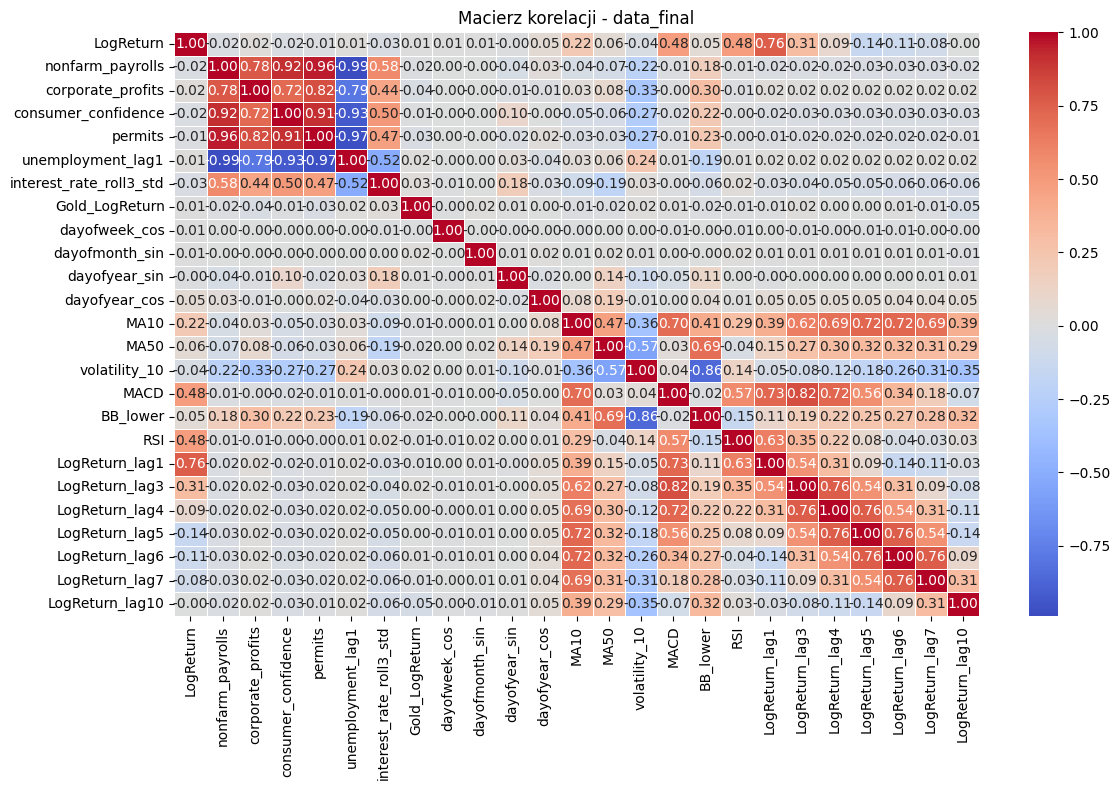

In [26]:
correlation_matrix = data_final.corr(numeric_only=True)

# 3. Wyświetlenie macierzy korelacji
print("\nMacierz korelacji:")
print(correlation_matrix)

# 4. Opcjonalnie: heatmapa korelacji
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Macierz korelacji - data_final")
plt.tight_layout()
plt.show()

In [27]:
data_final.to_csv("data_final.csv",index=False)